In [284]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib  import cm

In [285]:
# Read the City Data
city_data = pd.read_csv("data/city_data.csv")
city_data.head()

city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban

In [286]:
# Read the Ride Data
ride_data = pd.read_csv("data/ride_data.csv")
ride_data.head()

city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344

In [287]:
# Combine the data into a single dataset with common index of City #DO I NEED A PARTICULAR KIND OF MERGE?
combined_data = pd.merge(ride_data, city_data, on="city",how='inner')

# Display the data table for preview
combined_data.groupby('city').head(1).reset_index(drop=True).head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Bubble Plot of Ride Sharing Data

In [288]:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)
# Obtain the x and y coordinates for each of the three city types

In [289]:
#x = np.random.rand(40)--USE TRANSFORM?
ride_count = combined_data.groupby('city')['ride_id'].transform('count')
combined_data["ride_count"] = ride_count
combined_data.groupby('city').head(2).reset_index(drop=True).head(10)

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
3  South Michelleport  2018-03-02 09:54:50  33.12   813844006721   
4  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
5  Port Samanthamouth  2018-04-16 18:34:44   9.20  8712247654732   
6          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
7          Rodneyfort  2018-03-02 18:03:20  44.26  2494064867705   
8          South Jack  2018-03-06 04:28:35  34.58  3908451377344   
9          South Jack  2018-04-24 19:33:56  38.04  2197989679742   

   driver_count   type  ride_count  
0             5  Urban          24  
1             5  Urban          24  
2            72  Urban          31  
3            72  Urban          31  
4            57  Urban          25  
5            57  Urban          25  
6            34  Urban          23  
7            34  Urban          23  
8            46  Urban          19  
9            46  Urban          19

In [290]:
#y = np.random.rand(40)--USE TRANSFORM?
avg_fare = combined_data.groupby('city')['fare'].transform('mean').astype(float)
combined_data["avg_fare"] = avg_fare
combined_data.groupby('city').head(1).reset_index(drop=True).head(10)

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   
5        South Latoya  2018-03-11 12:26:48   9.52  1994999424437   
6       New Paulville  2018-02-27 11:17:56  43.25   793208410091   
7        Simpsonburgh  2018-04-26 00:43:24  35.98   111953927754   
8     South Karenland  2018-01-08 03:28:48  35.09  7995623208694   
9       North Jasmine  2018-03-09 06:26:29  42.81  5327642267789   

   driver_count   type  ride_count   avg_fare  
0             5  Urban          24  23.425833  
1            72  Urban          31  24.451613  
2            57  Urban          25  25.642800  
3            34  Urban          23  28.616957  
4            46  Urban          19  22.965263  
5            10  Urban          19  20.093158  
6            44  Urban          22  21.675909  
7            21  Urban          24  23.355833  
8             4  Urban          38  26.535526  
9            33  Urban          30  25.205333

In [291]:
#z
drivers = len('driver_count')
drivers

12

In [298]:
#colors - THIS NEEDS WORK
city_type = combined_data.groupby(by=combined_data["type"]).sum()

#Did not iterate or assign correct colors per city type: Gold, SkyBlue, and Coral
colors=["gold","lightskyblue","lightcoral"]

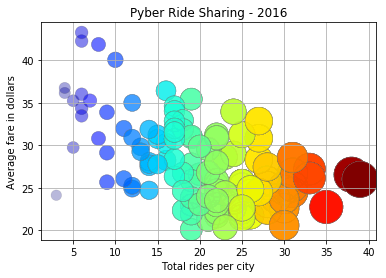

In [301]:
#NEED TO FIGURE OUT CMAP AND LEGEND
# create data
#x
ride_count
#y
avg_fare
#z--NEEDS ATTENTION
z = ride_count+drivers
z=z*z
   
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(ride_count, avg_fare, s=z*.5, c=ride_count, cmap=cm.jet, alpha=.1, edgecolors="grey",linewidth=.5)
plt.grid(linestyle='-')

#ran out of time to loop through colors to assign color and legend by city type

# Add titles (main and on axis)
plt.xlabel("Total rides per city")
plt.ylabel("Average fare in dollars")
plt.title("Pyber Ride Sharing - 2016")
#did not get bubble size labeled on upper right
    ##if I could get colors to iterate, could label as follows?
    ##plt.clabel=city_type.index


#save figure
plt.savefig("results/PyberRideSharing.png")
#show figure
plt.show()

## Total Fares by City Type

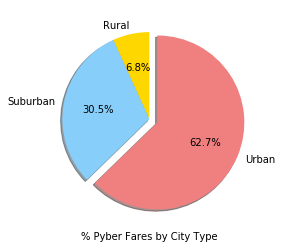

In [294]:
# Calculate Type Percents

# Build Pie Chart
ride_fare_by_citytype = combined_data.groupby(by=combined_data["type"]).sum()
plt.pie(x=ride_fare_by_citytype["fare"], explode=(0,0,.1), labels=ride_fare_by_citytype.index, colors=["gold","lightskyblue","lightcoral"], autopct='%1.1f%%',shadow=True, startangle=90)
plt.xlabel('% Pyber Fares by City Type')

# Save Figure
plt.savefig("results/PyFaresbyCityType.png")
# Show Figure
plt.show()

## Total Rides by City Type

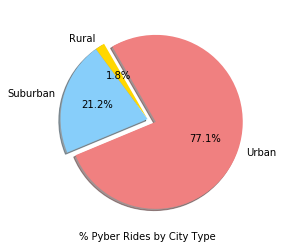

<Figure size 432x288 with 0 Axes>

In [295]:
# Calculate Ride Percents
rides_by_citytype = combined_data.groupby(by=combined_data["type"]).sum()
plt.pie(x=rides_by_citytype["ride_count"], explode=(0,0,.1), labels=rides_by_citytype.index, colors=["gold","lightskyblue","lightcoral"],autopct='%1.1f%%',shadow=True, startangle=120)
plt.xlabel('% Pyber Rides by City Type')
plt.show()

# Build Pie Chart

# Save Figure
plt.savefig("results/PyRidesbyCityType.png")
# Show Figure
plt.show()


## Total Drivers by City Type

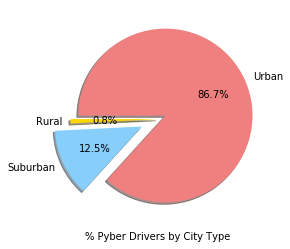

<Figure size 432x288 with 0 Axes>

In [296]:
# Calculate Driver Percents
drivers_by_citytype = combined_data.groupby(by=combined_data["type"]).sum()
plt.pie(x=drivers_by_citytype["driver_count"], explode=(0,.2,.1), labels=drivers_by_citytype.index, colors=["gold","lightskyblue","lightcoral"],autopct='%1.1f%%',shadow=True, startangle=180)
plt.xlabel('% Pyber Drivers by City Type')

plt.show()
# Build Pie Charts

# Save Figure
plt.savefig("results/PyDriversbyCityType.png")
# Show Figure
plt.show()

###### Trends in Pyber Ride Sharing
•	Urban markets drive fares down
•	Urban supply and demand is more consistent overall than rural
•	Those traveling in urban centers can predict a fare of $20-30 relatively consistently; drivers driving in urban center can expect to deliver 15-35 rides.
•	Sometimes if you adjust the start angle just so, it looks like Ms. Pacman eating pie.  Just sayin.
